In [3]:
import matplotlib.pyplot as plt
import numpy as np


from measure import MeasurementDevice, Measurement, TrajectoryEnsemble, make_sample_data
from numba import njit


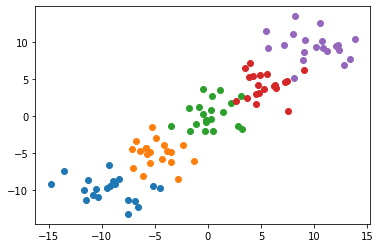

In [167]:
data = make_sample_data(N=100000, N_t=5, N_d=2, markov=False)
data_sample = data[:2, ::2]

trial_slice = np.s_[:20]
for i in range(len(data[0,:,0])):

    plt.scatter(data[trial_slice,i, 0], data[trial_slice,i, 1], alpha=1)


In [26]:
'''
traj_sample = np.s_[:, ::100, 1:, 0]
sample = np.s_[:, 0, 1:, 0]
experimental_data = np.load('../system_experiments/saved_data/eq_process_3D.npy')[traj_sample]
exp_data_trimmed = experimental_data[:3]
exp_data_trimmed.shape


(3, 6, 2)

(50000, 3, 2)


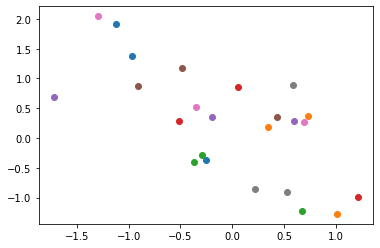

In [183]:
print(experimental_data.shape)
for i in range(8):
    plt.scatter(experimental_data[i,:,0], experimental_data[i,:,1])

In [168]:
binary_device = MeasurementDevice(trajectory_mode=True)

In [169]:
for item in [binary_device.outcome_names, binary_device.outcome_values, binary_device.transform]:
    print(item)

None
None
CPUDispatcher(<function binary_partition at 0x7fd7fe8dcdd0>)


In [170]:
measured_data, objective_function = binary_device.apply(exp_data_trimmed)

In [171]:
for item in [binary_device.outcome_names, binary_device.outcome_values, binary_device.transform]:
    print(item)

['00', '01', '10', '11']
[(0, 0), (0, 1), (1, 0), (1, 1)]
CPUDispatcher(<function binary_partition at 0x7fd7fe8dcdd0>)


In [172]:
objective_function[2]

array([[False,  True, False, False, False, False],
       [False, False,  True, False,  True,  True],
       [False, False,  True, False, False,  True]])

In [173]:
measured_data

array([[[0., 1.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [1., 1.],
        [0., 1.]],

       [[1., 1.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [1., 0.]],

       [[0., 0.],
        [0., 1.],
        [1., 0.],
        [0., 0.],
        [0., 1.],
        [1., 0.]]])

In [33]:
'''
for item in range(4):
    plt.plot(data[item,:,0], data[item,:,1], marker='o')
line_kwargs = {'c':'k', 'linestyle':'--'}
plt.axhline(0,0, **line_kwargs)
plt.axvline(0,0, **line_kwargs)
if cg.state_coords is not None:
    for loc, name in zip(cg.state_coords, cg.state_names):
        loc = np.multiply(10, loc)- (5,5) 
        plt.text(*loc, name) 
'''

"\nfor item in range(4):\n    plt.plot(data[item,:,0], data[item,:,1], marker='o')\nline_kwargs = {'c':'k', 'linestyle':'--'}\nplt.axhline(0,0, **line_kwargs)\nplt.axvline(0,0, **line_kwargs)\nif cg.state_coords is not None:\n    for loc, name in zip(cg.state_coords, cg.state_names):\n        loc = np.multiply(10, loc)- (5,5) \n        plt.text(*loc, name) \n"

In [176]:
%%time
binary_measurement = Measurement(binary_device, dataset=data)

CPU times: user 210 ms, sys: 7.26 ms, total: 218 ms
Wall time: 218 ms


In [177]:
md = binary_measurement.measured_data
md.shape

(100000, 5, 2)

In [178]:
boolean_lookup = binary_device.get_lookup(binary_measurement.booleans)

In [181]:
boolean_lookup['00'][:5]

array([[ True,  True, False, False, False],
       [ True,  True, False, False, False],
       [ True,  True, False, False, False],
       [ True,  True,  True, False, False],
       [ True,  True,  True, False, False]])

In [182]:
%%time
tbn = binary_measurement.trajectories_by_number()

CPU times: user 8.26 ms, sys: 2.58 ms, total: 10.8 ms
Wall time: 9.26 ms


In [250]:
tbn

array([[1, 1, 4, 4, 4],
       [1, 1, 4, 4, 4],
       [1, 1, 4, 4, 4],
       ...,
       [1, 1, 4, 4, 4],
       [1, 1, 2, 4, 4],
       [1, 1, 3, 4, 4]], dtype=uint8)

In [184]:
%time
traj_ensemble = binary_measurement.calculate_trajectory_statistics()

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.01 µs
found 30 unique trajectories in 100000 samples


In [189]:
traj, counts = traj_ensemble.trajectory_statistics
traj.shape

(30, 5)

In [186]:
num_lu = binary_device.get_lookup(traj_ensemble.outcome_numbers)

In [225]:
traj

array([[1, 1, 3, 4, 4],
       [1, 1, 4, 4, 4],
       [1, 1, 1, 4, 4],
       [1, 1, 2, 4, 4],
       [1, 1, 4, 2, 4],
       [1, 3, 3, 4, 4],
       [1, 2, 2, 4, 4],
       [1, 1, 1, 3, 4],
       [1, 1, 3, 3, 4],
       [1, 1, 2, 3, 4],
       [1, 3, 1, 4, 4],
       [1, 1, 1, 2, 4],
       [1, 1, 2, 2, 4],
       [1, 3, 4, 4, 4],
       [1, 2, 3, 4, 4],
       [1, 2, 1, 4, 4],
       [1, 1, 3, 2, 4],
       [1, 2, 4, 4, 4],
       [1, 1, 4, 3, 4],
       [1, 3, 2, 4, 4],
       [1, 4, 2, 4, 4],
       [1, 2, 2, 2, 4],
       [1, 3, 1, 3, 4],
       [1, 3, 3, 3, 4],
       [1, 4, 4, 4, 4],
       [1, 2, 3, 2, 4],
       [1, 3, 2, 3, 4],
       [1, 3, 4, 2, 4],
       [1, 3, 4, 3, 4],
       [1, 2, 2, 3, 2]], dtype=uint8)

In [239]:
((traj[:,1:-1].any(axis=1) == num_lu['00']) | (traj[:,1:-1].any(axis=1) == num_lu['11']))

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [204]:
t_slice = np.s_[:,1:-1]

In [240]:
inside = ((traj[t_slice] == num_lu['00']) | (traj[t_slice] == num_lu['11'])).all(axis=1) & (traj[:,-1] == num_lu['11'])

In [241]:
outside = ((traj[:,0] == num_lu['00']) & (traj[:,-1] == num_lu['11']))

In [256]:
 ~(inside & outside)

array([ True, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True])

In [247]:
counts[:3]

array([0.24515, 0.24456, 0.24341])

In [210]:
(traj[t_slice] == num_lu['10']).any(axis=())

array([[False,  True, False],
       [False, False, False],
       [False, False, False],
       [False, False, False],
       [False, False, False],
       [ True,  True, False],
       [False, False, False],
       [False, False,  True],
       [False,  True,  True],
       [False, False,  True],
       [ True, False, False],
       [False, False, False],
       [False, False, False],
       [ True, False, False],
       [False,  True, False],
       [False, False, False],
       [False,  True, False],
       [False, False, False],
       [False, False,  True],
       [ True, False, False],
       [False, False, False],
       [False, False, False],
       [ True, False,  True],
       [ True,  True,  True],
       [False, False, False],
       [False,  True, False],
       [ True, False,  True],
       [ True, False, False],
       [ True, False,  True],
       [False, False,  True]])

In [41]:
counts[np.all(traj==traj[0][::-1], axis=-1)]

array([0.0018])

In [178]:
counts[0]

0.12698

In [112]:
%%time
traj_ensemble.get_local_transition_matrix(traj_ensemble.unique_traj, traj_ensemble.traj_probs, 3)

CPU times: user 14.1 ms, sys: 1.51 ms, total: 15.6 ms
Wall time: 14.5 ms


array([[0.148301  , 0.34984179, 0.35286835, 0.14898886],
       [0.14514215, 0.3539818 , 0.35217318, 0.14870288],
       [0.1488018 , 0.34705385, 0.35680857, 0.14733578],
       [0.1436396 , 0.35464877, 0.35560728, 0.14610434]])

In [160]:
%%time
dynamics = traj_ensemble.calculate_dynamics()

CPU times: user 3.2 ms, sys: 403 µs, total: 3.6 ms
Wall time: 3.4 ms


In [161]:
dynamics

array([[[0.15036257, 0.35203174, 0.35723081, 0.14037488],
        [0.14508739, 0.35624187, 0.35386617, 0.14480457],
        [0.14442987, 0.3538874 , 0.35314586, 0.14853688],
        [0.14917792, 0.34781446, 0.35423072, 0.1487769 ]],

       [[0.14387309, 0.35216083, 0.3547593 , 0.14920678],
        [0.15008203, 0.35079482, 0.35068168, 0.14844148],
        [0.14456743, 0.3489948 , 0.36011972, 0.14631805],
        [0.1463782 , 0.35533342, 0.3493085 , 0.14897987]]])

In [158]:
local_bools = traj_ensemble.markovity_test(dynamics)

16 of 16 transition matrix elements stay within 0.05 of their means 80.0% of the time


In [157]:
rp = traj_ensemble.reversibility_test(tol_kwargs = {'rtol':.05})

45 out of 64 trajectories were reversible


In [122]:
traj_ensemble.traj_probs[:10]

array([0.00606, 0.00602, 0.00594, 0.00594, 0.0059 , 0.00578, 0.00574,
       0.00572, 0.00572, 0.0057 ])

In [123]:
rp[:10]

[0.00572,
 0.00564,
 0.00594,
 0.00594,
 0.00526,
 0.00552,
 0.0047,
 0.00606,
 0.00556,
 0.0057]